<a href="https://colab.research.google.com/github/rileyseefeldt/MAT421/blob/main/HW22_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##22.4 Numerican Error and Instability

The two primary issues with integration techniques for ODEs are accuracy and stability. When solving ODEs, as it it integrated further in time the error can change at random rates, which causes the stability of the integration scheme to decrease since it is unable to prevent error from growing.

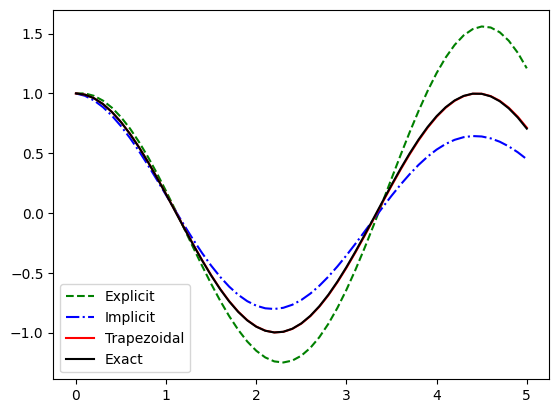

In [5]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt


#parameters
h = 0.1
t = np.arange(0, 5.1, h)
k = 2
s0 = np.array([[1], [0]])

#function equation  mass-spring system
# calculates to cos(sqrt(2t))
m_e = np.array([[1, h], [-k*h, 1]])
m_i = inv(np.array([[1, -h], [k*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2], [k*h/2, 1]])), np.array([[1, h/2], [-k*h/2, 1]]))

#variables to hold integration
s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

#integrate
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e, s_e[j, :])
    s_i[j+1, :] = np.dot(m_i, s_i[j, :])
    s_t[j+1, :] = np.dot(m_t, s_t[j, :])

#vizualization
plt.figure()
plt.plot(t, s_e[:,0], 'g--')
plt.plot(t, s_i[:,0], 'b-.')
plt.plot(t, s_t[:,0], 'r-')
plt.plot(t, np.cos(np.sqrt(k)*t), 'k')
plt.legend(['Explicit', 'Implicit', 'Trapezoidal', 'Exact'])
plt.show()


##22.5 Predictor-Corrector Methods

Predictor-Corrector methods are numerical integration methods which try to solve the error/instability problem associated with solving ODEs. There are two parts to any predictor-corrector method.

1. The predictor: an explicit formula that estimates the solution at tj+1
2. The corrector: an implicit method or more accurate method for the new value to improve accuracy

For example the midpoint method has a predictor step here:

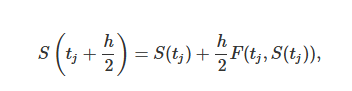

and computes the corrector step with the equation:

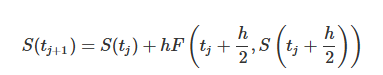

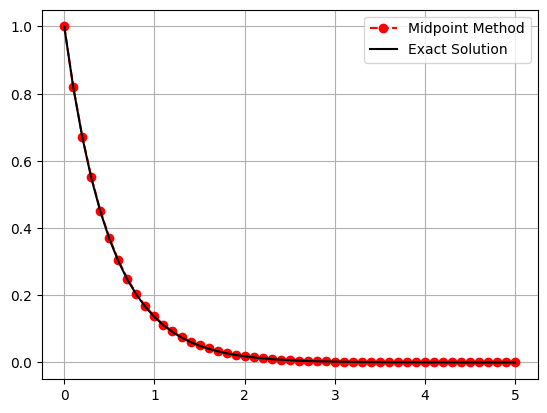

In [8]:
import numpy as np
import matplotlib.pyplot as plt

#parameters
h = 0.1
t = np.arange(0, 5+h, h)
y0 = 1

#dy/dt = -2y
def f(t, y):
    return -2 * y

#midpoint method
y_midpoint = np.zeros(len(t))
y_midpoint[0] = y0

for j in range(len(t) - 1):
    #predictor step to calculate midpoint
    y_half = y_midpoint[j] + (h / 2) * f(t[j], y_midpoint[j])

    #corrector step to estimate next step
    y_midpoint[j + 1] = y_midpoint[j] + h * f(t[j] + h / 2, y_half)

#exact solution
y_exact = np.exp(-2 * t)

#vizualization
plt.figure()
plt.plot(t, y_midpoint, 'r--o', label='Midpoint Method')
plt.plot(t, y_exact, 'k', label='Exact Solution')
plt.legend()
plt.grid(True)
plt.show()
